In [2]:
import pandas as pd
import numpy as np
from sklearn import datasets
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import warnings

warnings.filterwarnings('ignore')

In [3]:
titanic = pd.read_csv("train.csv")
titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [5]:
titanic.Sex=titanic.Sex.replace({"male":1, "female":2})

In [5]:
titanic=titanic.drop("PassengerId", axis=1)
titanic=titanic.drop("Ticket", axis=1)
titanic=titanic.drop("Name", axis=1)
titanic=titanic.drop("Cabin", axis=1)
titanic['Age'] = titanic['Age'].fillna(titanic['Age'].mean())
titanic=titanic.dropna(subset=['Embarked'])

In [6]:
titanic.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.000000,1,0,7.2500,S
1,1,1,2,38.000000,1,0,71.2833,C
2,1,3,2,26.000000,0,0,7.9250,S
3,1,1,2,35.000000,1,0,53.1000,S
4,0,3,1,35.000000,0,0,8.0500,S
5,0,3,1,29.699118,0,0,8.4583,Q
6,0,1,1,54.000000,0,0,51.8625,S
7,0,3,1,2.000000,3,1,21.0750,S
8,1,3,2,27.000000,0,2,11.1333,S
9,1,2,2,14.000000,1,0,30.0708,C


In [7]:
titanic.Embarked=titanic.Embarked.replace({'C':1, 'S':2, 'Q':3})


In [8]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 8 columns):
Survived    889 non-null int64
Pclass      889 non-null int64
Sex         889 non-null int64
Age         889 non-null float64
SibSp       889 non-null int64
Parch       889 non-null int64
Fare        889 non-null float64
Embarked    889 non-null int64
dtypes: float64(2), int64(6)
memory usage: 62.5 KB


In [9]:
titanic.head()


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,2,38.0,1,0,71.2833,1
2,1,3,2,26.0,0,0,7.9250,2
3,1,1,2,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [10]:
X=titanic.iloc[:,2:]
y=titanic["Survived"]

In [11]:
X_eğitim, X_test, y_eğitim, y_test = train_test_split(X, y, test_size=0.20, random_state=276)

In [12]:
model_1=titanic[["Pclass", "Sex", "Age"]]

X_eğitim, X_test, y_eğitim, y_test = train_test_split(model_1, y, test_size=0.20, random_state=276)

loj_1vsR=LogisticRegression()
loj_1vsR.fit(X_eğitim, y_eğitim)

loj_mnm = LogisticRegression(multi_class='multinomial', solver='lbfgs')
loj_mnm.fit(X_eğitim, y_eğitim)


egt_dogruluk_1vsR = loj_1vsR.score(X_eğitim, y_eğitim)
test_dogruluk_1vsR = loj_1vsR.score(X_test, y_test)

egt_dogruluk_mnm = loj_mnm.score(X_eğitim, y_eğitim)
test_dogruluk_mnm = loj_mnm.score(X_test, y_test)

print('One-vs-rest', '-'*20,
      'Modelin eğitim verisindeki doğruluğu : {:.2f}'.format(egt_dogruluk_1vsR), 
      'Modelin test verisindeki doğruluğu   : {:.2f}'.format(test_dogruluk_1vsR), sep='\n')

print('\n\nMultinomial (Softmax)', '-'*20, 
      'Modelin eğitim verisindeki doğruluğu : {:.2f}'.format(egt_dogruluk_mnm), 
      'Modelin test verisindeki doğruluğu   : {:.2f}'.format(test_dogruluk_mnm), sep='\n')

One-vs-rest
--------------------
Modelin eğitim verisindeki doğruluğu : 0.80
Modelin test verisindeki doğruluğu   : 0.78


Multinomial (Softmax)
--------------------
Modelin eğitim verisindeki doğruluğu : 0.80
Modelin test verisindeki doğruluğu   : 0.78


In [16]:
model_2=titanic[["Pclass", "Sex", "Age", "SibSp"]]

X_eğitim, X_test, y_eğitim, y_test = train_test_split(model_2, y, test_size=0.20, random_state=276)

loj_1vsR=LogisticRegression()
loj_1vsR.fit(X_eğitim, y_eğitim)

loj_mnm = LogisticRegression(multi_class='multinomial', solver='lbfgs')
loj_mnm.fit(X_eğitim, y_eğitim)


egt_dogruluk_1vsR = loj_1vsR.score(X_eğitim, y_eğitim)
test_dogruluk_1vsR = loj_1vsR.score(X_test, y_test)

egt_dogruluk_mnm = loj_mnm.score(X_eğitim, y_eğitim)
test_dogruluk_mnm = loj_mnm.score(X_test, y_test)

print('One-vs-rest', '-'*20,
      'Modelin eğitim verisindeki doğruluğu : {:.2f}'.format(egt_dogruluk_1vsR), 
      'Modelin test verisindeki doğruluğu   : {:.2f}'.format(test_dogruluk_1vsR), sep='\n')

print('\n\nMultinomial (Softmax)', '-'*20, 
      'Modelin eğitim verisindeki doğruluğu : {:.2f}'.format(egt_dogruluk_mnm), 
      'Modelin test verisindeki doğruluğu   : {:.2f}'.format(test_dogruluk_mnm), sep='\n')

One-vs-rest
--------------------
Modelin eğitim verisindeki doğruluğu : 0.80
Modelin test verisindeki doğruluğu   : 0.75


Multinomial (Softmax)
--------------------
Modelin eğitim verisindeki doğruluğu : 0.80
Modelin test verisindeki doğruluğu   : 0.75


In [17]:
model_3=titanic[["Pclass", "Sex", "Age", "SibSp", "Embarked"]]

X_eğitim, X_test, y_eğitim, y_test = train_test_split(model_3, y, test_size=0.20, random_state=276)

loj_1vsR=LogisticRegression()
loj_1vsR.fit(X_eğitim, y_eğitim)

loj_mnm = LogisticRegression(multi_class='multinomial', solver='lbfgs')
loj_mnm.fit(X_eğitim, y_eğitim)


egt_dogruluk_1vsR = loj_1vsR.score(X_eğitim, y_eğitim)
test_dogruluk_1vsR = loj_1vsR.score(X_test, y_test)

egt_dogruluk_mnm = loj_mnm.score(X_eğitim, y_eğitim)
test_dogruluk_mnm = loj_mnm.score(X_test, y_test)

print('One-vs-rest', '-'*20,
      'Modelin eğitim verisindeki doğruluğu : {:.2f}'.format(egt_dogruluk_1vsR), 
      'Modelin test verisindeki doğruluğu   : {:.2f}'.format(test_dogruluk_1vsR), sep='\n')

print('\n\nMultinomial (Softmax)', '-'*20, 
      'Modelin eğitim verisindeki doğruluğu : {:.2f}'.format(egt_dogruluk_mnm), 
      'Modelin test verisindeki doğruluğu   : {:.2f}'.format(test_dogruluk_mnm), sep='\n')


One-vs-rest
--------------------
Modelin eğitim verisindeki doğruluğu : 0.81
Modelin test verisindeki doğruluğu   : 0.76


Multinomial (Softmax)
--------------------
Modelin eğitim verisindeki doğruluğu : 0.81
Modelin test verisindeki doğruluğu   : 0.76


In [20]:
model_4=titanic[["Pclass", "Sex", "Age", "SibSp", "Embarked", "Fare"]]

X_eğitim, X_test, y_eğitim, y_test = train_test_split(model_4, y, test_size=0.20, random_state=276)

loj_1vsR=LogisticRegression()
loj_1vsR.fit(X_eğitim, y_eğitim)

loj_mnm = LogisticRegression(multi_class='multinomial', solver='lbfgs')
loj_mnm.fit(X_eğitim, y_eğitim)


egt_dogruluk_1vsR = loj_1vsR.score(X_eğitim, y_eğitim)
test_dogruluk_1vsR = loj_1vsR.score(X_test, y_test)

egt_dogruluk_mnm = loj_mnm.score(X_eğitim, y_eğitim)
test_dogruluk_mnm = loj_mnm.score(X_test, y_test)

print('One-vs-rest', '-'*20,
      'Modelin eğitim verisindeki doğruluğu : {:.2f}'.format(egt_dogruluk_1vsR), 
      'Modelin test verisindeki doğruluğu   : {:.2f}'.format(test_dogruluk_1vsR), sep='\n')

print('\n\nMultinomial (Softmax)', '-'*20, 
      'Modelin eğitim verisindeki doğruluğu : {:.2f}'.format(egt_dogruluk_mnm), 
      'Modelin test verisindeki doğruluğu   : {:.2f}'.format(test_dogruluk_mnm), sep='\n')


One-vs-rest
--------------------
Modelin eğitim verisindeki doğruluğu : 0.81
Modelin test verisindeki doğruluğu   : 0.76


Multinomial (Softmax)
--------------------
Modelin eğitim verisindeki doğruluğu : 0.81
Modelin test verisindeki doğruluğu   : 0.76


In [22]:
model_5=titanic[["Pclass", "Sex", "Fare", "Age"]]

X_eğitim, X_test, y_eğitim, y_test = train_test_split(model_5, y, test_size=0.20, random_state=276)

loj_1vsR=LogisticRegression()
loj_1vsR.fit(X_eğitim, y_eğitim)

loj_mnm = LogisticRegression(multi_class='multinomial', solver='lbfgs')
loj_mnm.fit(X_eğitim, y_eğitim)


egt_dogruluk_1vsR = loj_1vsR.score(X_eğitim, y_eğitim)
test_dogruluk_1vsR = loj_1vsR.score(X_test, y_test)

egt_dogruluk_mnm = loj_mnm.score(X_eğitim, y_eğitim)
test_dogruluk_mnm = loj_mnm.score(X_test, y_test)

print('One-vs-rest', '-'*20,
      'Modelin eğitim verisindeki doğruluğu : {:.2f}'.format(egt_dogruluk_1vsR), 
      'Modelin test verisindeki doğruluğu   : {:.2f}'.format(test_dogruluk_1vsR), sep='\n')

print('\n\nMultinomial (Softmax)', '-'*20, 
      'Modelin eğitim verisindeki doğruluğu : {:.2f}'.format(egt_dogruluk_mnm), 
      'Modelin test verisindeki doğruluğu   : {:.2f}'.format(test_dogruluk_mnm), sep='\n')

One-vs-rest
--------------------
Modelin eğitim verisindeki doğruluğu : 0.80
Modelin test verisindeki doğruluğu   : 0.78


Multinomial (Softmax)
--------------------
Modelin eğitim verisindeki doğruluğu : 0.80
Modelin test verisindeki doğruluğu   : 0.78


In [18]:
titanic.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,1.000000,-0.335549,0.541585,-0.074673,-0.034040,0.083151,0.255290,-0.126753
Pclass,-0.335549,1.000000,-0.127741,-0.327954,0.081656,0.016824,-0.548193,0.307324
Sex,0.541585,-0.127741,1.000000,-0.089434,0.116348,0.247508,0.179958,-0.023175
Age,-0.074673,-0.327954,-0.089434,1.000000,-0.231875,-0.178232,0.088604,-0.032745
SibSp,-0.034040,0.081656,0.116348,-0.231875,1.000000,0.414542,0.160887,0.031095
Parch,0.083151,0.016824,0.247508,-0.178232,0.414542,1.000000,0.217532,-0.035756
Fare,0.255290,-0.548193,0.179958,0.088604,0.160887,0.217532,1.000000,-0.269588
Embarked,-0.126753,0.307324,-0.023175,-0.032745,0.031095,-0.035756,-0.269588,1.000000


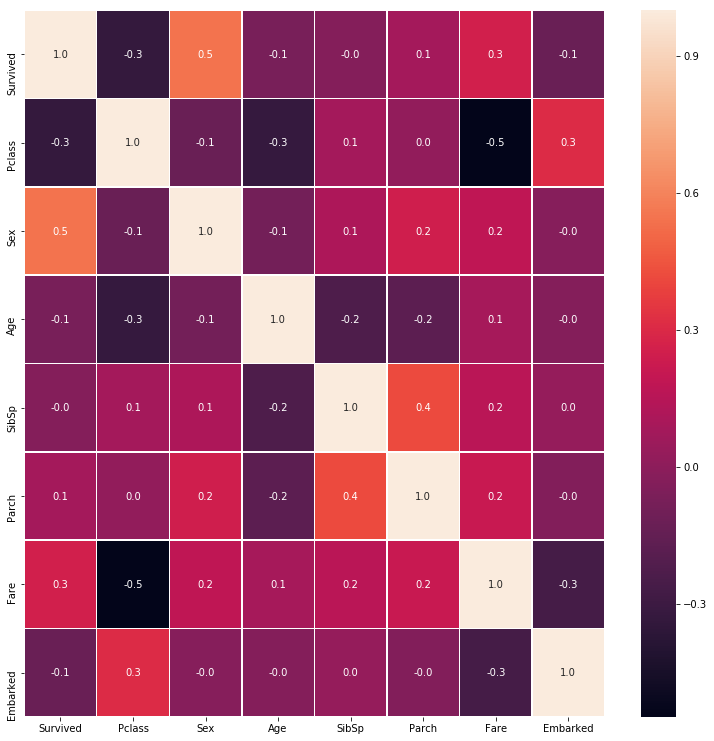

In [19]:
f,ax = plt.subplots(figsize=(13, 13))
sns.heatmap(titanic.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()